In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\kotesh Reddy\Downloads\archive (14)\Ecommerce Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.shape

(500, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
#Check missing values
df.isnull().sum()
#There are no missing values

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
#Check Statistics
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
#Check correlation
df.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


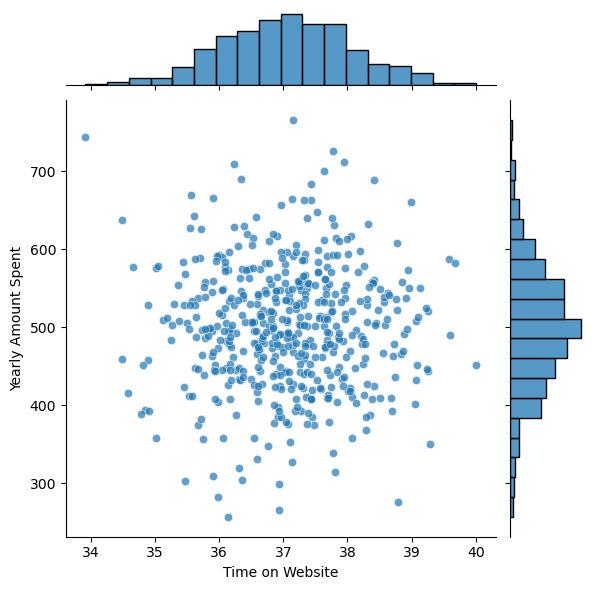

In [9]:
sns.jointplot(x = df["Time on Website"],y = df["Yearly Amount Spent"],alpha=0.7)

In [10]:
df["Time on Website"].corr(df["Yearly Amount Spent"])

-0.0026408446721588536

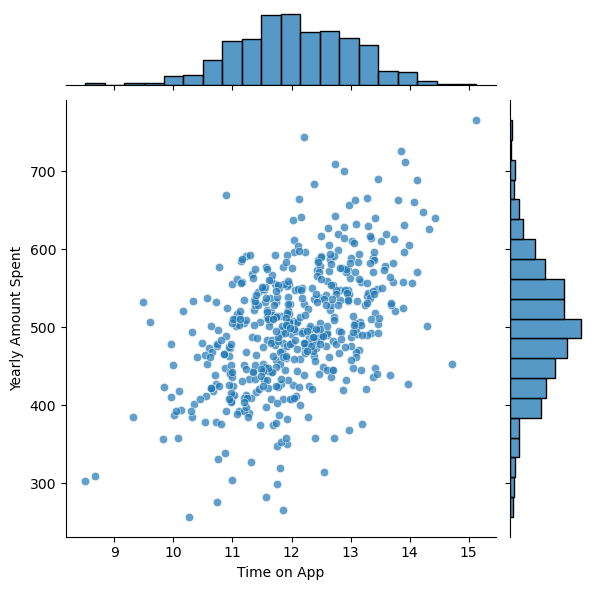

In [11]:
sns.jointplot(x = df["Time on App"],y = df["Yearly Amount Spent"],alpha=0.7)

In [12]:
df["Time on App"].corr(df["Yearly Amount Spent"])

0.49932777005345036

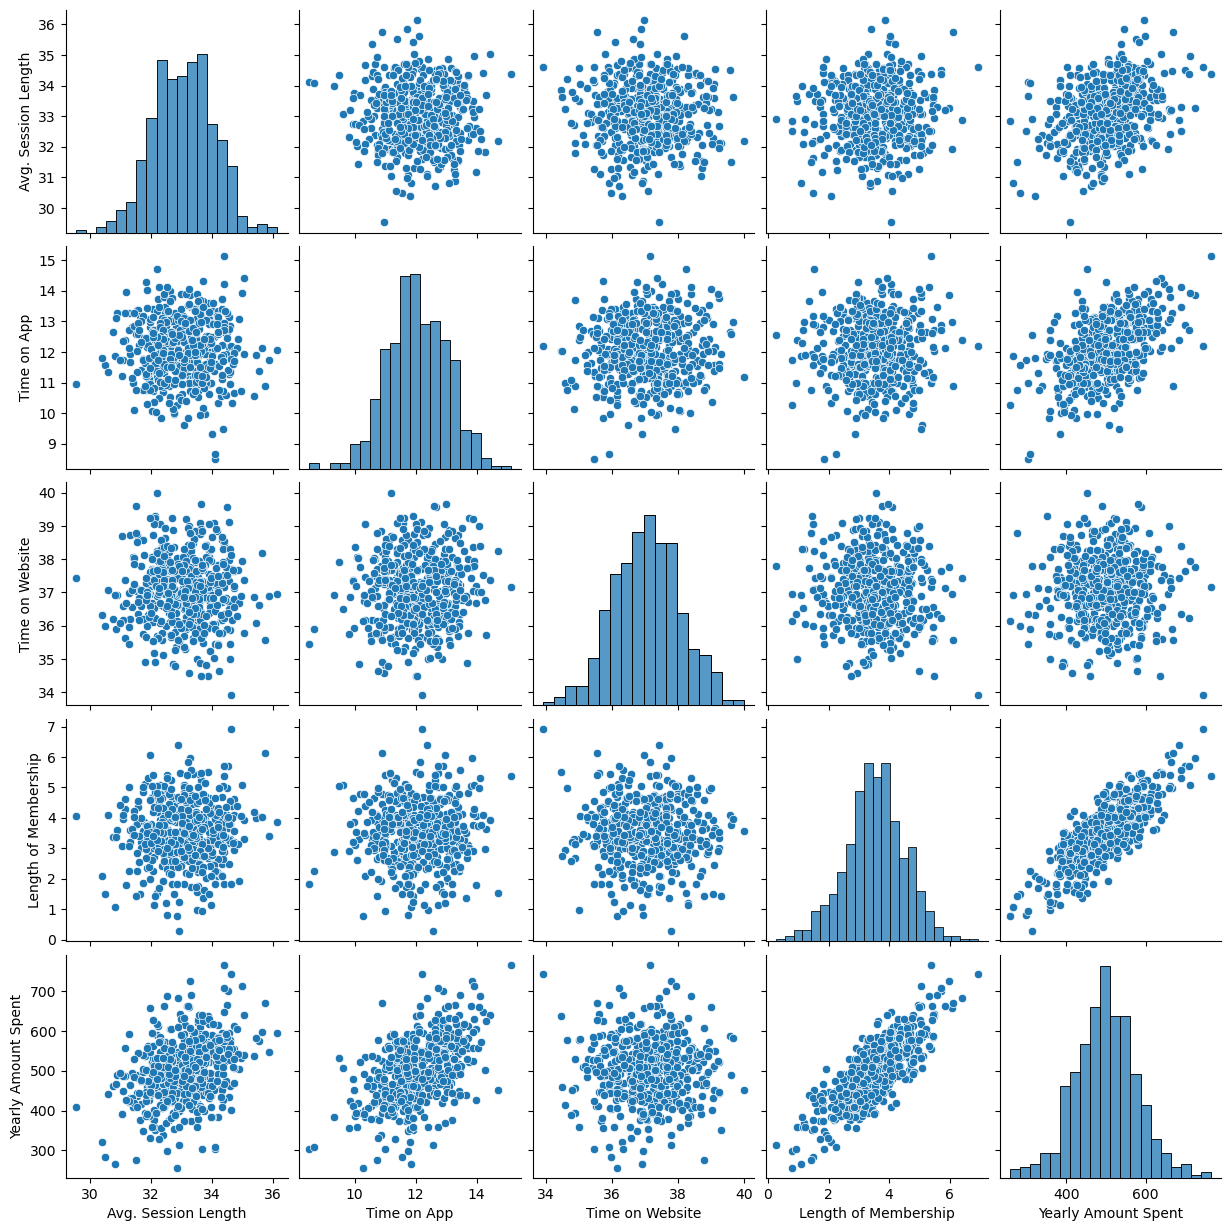

In [13]:
sns.pairplot(df)

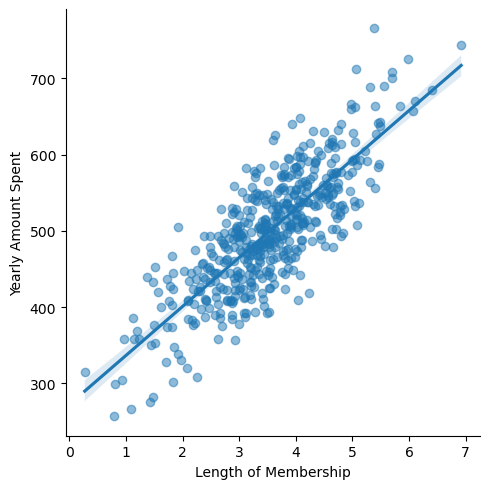

In [14]:
sns.lmplot(x = "Length of Membership",y = "Yearly Amount Spent",data=df,scatter_kws={"alpha":0.5})

In [15]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [16]:
#Split data into Test|Train

X = df.drop(["Email","Address","Avatar","Yearly Amount Spent"],axis=1)
y = df["Yearly Amount Spent"]

In [50]:
#Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
X_train.shape
X_test.shape

(125, 4)

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X_train,y_train)

StandardScaler()

In [22]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[-0.97828982, -1.70788625,  2.02271795, -0.13586535],
       [-0.24335401,  0.77837033,  0.04272885,  0.27396127],
       [-1.61173296, -1.95582836,  1.03774334,  0.65400882],
       [-0.60441078,  1.42339792,  0.24653396, -0.62050883],
       [-1.66989694, -1.05708401,  1.06822541, -0.14146687],
       [-0.62319159,  1.85590928,  1.37059366,  0.1967073 ],
       [ 1.99706866, -0.10888175, -1.18405145, -0.258129  ],
       [-0.03618023, -0.28484903,  0.57235845,  0.25685239],
       [-0.62327266, -0.74292491,  0.68075684, -0.7796067 ],
       [-0.05267068, -1.1047926 ,  0.64870601,  0.24885372],
       [-1.12006977, -0.23152804,  0.15446026, -0.36362188],
       [ 0.41083289, -0.65997679,  0.90567245, -0.98881595],
       [-0.186454  ,  0.03097085, -1.3952185 , -1.15348604],
       [ 1.61310432, -1.71775809, -0.8169539 ,  0.80963332],
       [-0.64987411, -0.43807236,  1.10362863, -0.59579444],
       [ 0.54252784, -1.10959781, -0.80393672, -0.77524091],
       [ 0.18785453,  1.

In [24]:
l_model = LinearRegression()

In [25]:
l_model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = l_model.predict(X_test)

In [27]:
mean_absolute_error(y_test,y_pred)

8.46045417014118

In [28]:
p_model = PolynomialFeatures(degree=3)

In [29]:
p_model.fit(X_train,y_train)

PolynomialFeatures(degree=3)

In [30]:
X_train = p_model.transform(X_train)
X_test = p_model.transform(X_test)

In [31]:
model = LinearRegression()

In [32]:
y_p = model.fit(X_train,y_train)

In [33]:
y_pred = model.predict(X_test)

In [34]:
mean_absolute_error(y_test,y_pred)

8.72967407686479

C:\Users\kotesh Reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly Amount Spent'>

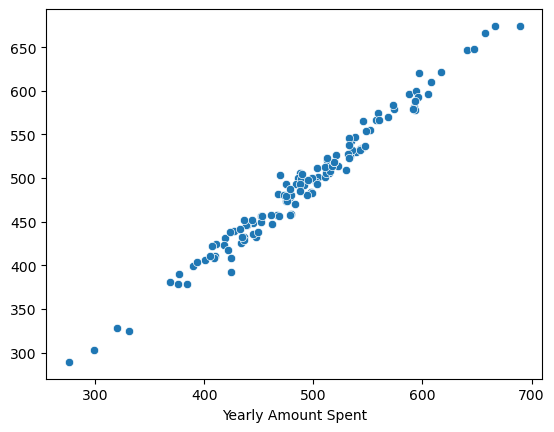

In [35]:
sns.scatterplot(y_test,y_pred)

In [36]:
#For linear regression we have error of 8.4 dollars
#For Polynomial regression we have error of 8.7 dollars

#### Residuals

In [37]:
r = y_test-y_pred

In [38]:
pd.DataFrame(r)

,Yearly Amount Spent
361,-5.467829
73,-7.728354
374,-12.954726
155,2.862915
104,-1.133865
...,...
220,0.806803
176,-4.929027
320,-12.633192
153,-9.192046


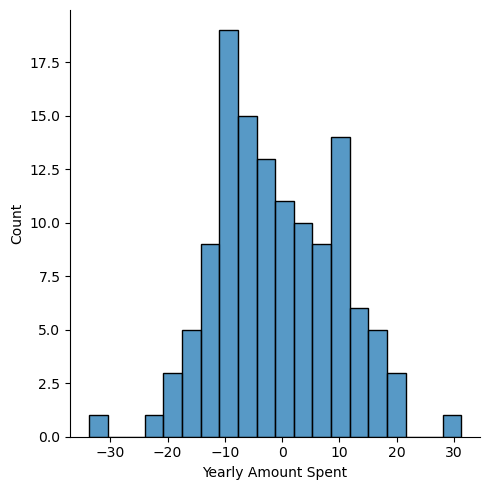

In [39]:
sns.displot(r,bins=20)

In [40]:
import pylab
import scipy.stats as st

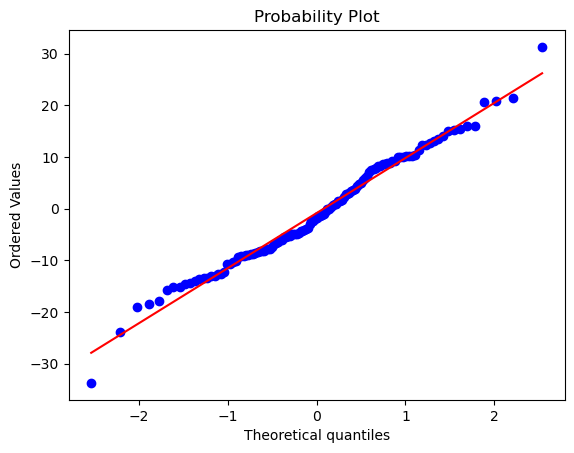

In [41]:
st.probplot(r,dist="norm",plot=pylab)
pylab.show()

In [42]:
import joblib

# Save a model to a file
joblib.dump(l_model, 'E_commerce_model.pkl')



['E_commerce_model.pkl']

In [43]:
# Load the model from the file
loaded_model = joblib.load('E_commerce_model.pkl')
